In [1]:
import os
import sys

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np

from core.extractor import GroundedSAMInstanceExtractor
from core.extractor.utils import isolate_boolean_masks

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
extractor = GroundedSAMInstanceExtractor(ram_ckpt='', grounding_dino_ckpt='', grounding_dino_config_pth='', sam_hq_ckpt='')

In [4]:
results = extractor.load('/storage/quanta/Experiments/feature-instance-fusion/scannet_scene0000_00/grounded_sam/000099.pt', device='cpu')

In [5]:
masks = extractor.get_masks(results=results)

In [6]:
masks.shape

torch.Size([4, 968, 1296])

In [8]:
np.zeros(shape=(masks.shape[0]),dtype=bool).copy().view(f"a{masks.shape[0]}")

array([b''], dtype='|S4')

In [9]:
np.unique(np.moveaxis(masks.numpy(), 0, -1).copy().view(f"a{masks.shape[0]}"))

array([b'', b'\x00\x00\x00\x01', b'\x00\x00\x01', b'\x00\x01', b'\x01'],
      dtype='|S4')

In [10]:
isolate_boolean_masks(masks.numpy()).max()

4

In [11]:
import torch
import numpy as np

In [12]:
path = '/storage/quanta/Experiments/feature-instance-fusion/scannet_scene0000_00/kmeans_patch_corres_grounded_sam/000099.pt'

In [13]:
frame_info = torch.load(path)

In [14]:
np.unique(frame_info['masks'])

array([0, 1, 2, 3, 4])

In [15]:
import matplotlib.pyplot as plt

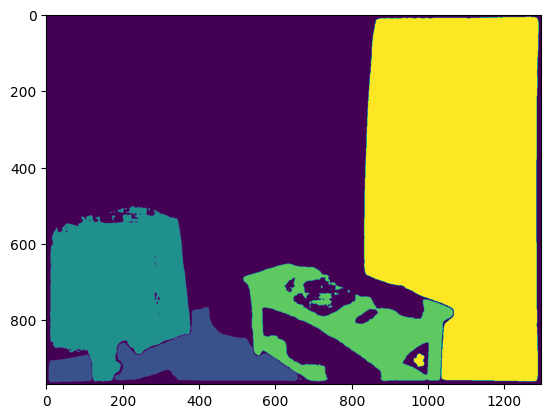

In [16]:
plt.imshow(frame_info['masks'])

In [17]:
num_voxel = np.array([corres["num_voxel_in_frame"] for corres in frame_info["patch_corres"]])

In [18]:
num_pixel = np.array([corres["num_pixel_in_frame"] for corres in frame_info["patch_corres"]])

In [19]:
mask_id = np.array([corres["most_likely_maskid"] for corres in frame_info["patch_corres"]])

In [20]:
num_pixel_most_prob = np.array([corres["num_pixel_in_mask"] for corres in frame_info["patch_corres"]])

<BarContainer object of 100 artists>

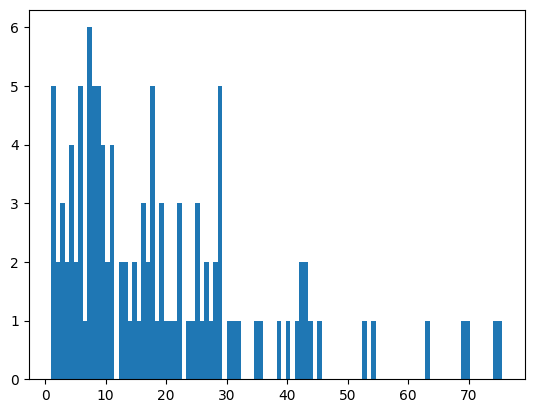

In [21]:
plt.hist(num_pixel[mask_id!=0] / num_voxel[mask_id!=0], bins=100)[2]

<BarContainer object of 100 artists>

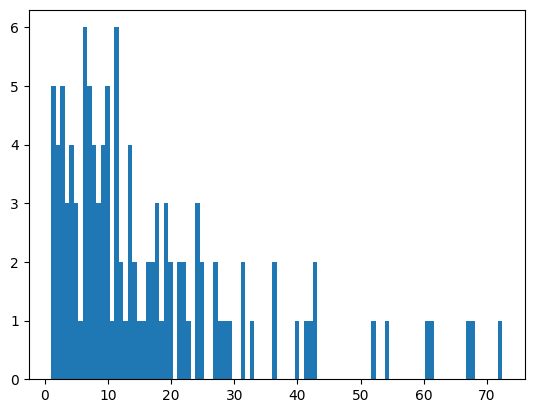

In [22]:
plt.hist(num_pixel_most_prob[mask_id!=0] / num_voxel[mask_id!=0], bins=100)[2]